In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt


In [ ]:
hotel = pd.read_csv("/content/bookings.csv")

In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   hotel                           119390 non-null  object
 1   market_segment                  119390 non-null  object
 2   deposit_type                    119390 non-null  object
 3   lead_time                       119390 non-null  int64 
 4   previous_cancellations          119390 non-null  int64 
 5   previous_bookings_not_canceled  119390 non-null  int64 
 6   days_in_waiting_list            119390 non-null  int64 
 7   booking_changes                 119390 non-null  int64 
 8   total_of_special_requests       119390 non-null  int64 
 9   is_canceled                     119390 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 9.1+ MB


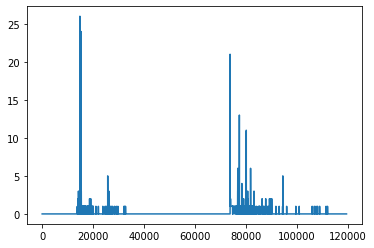

In [ ]:
plt.plot(hotel['previous_cancellations'])

In [ ]:
new = pd.DataFrame(hotel['is_canceled'].value_counts()/hotel['is_canceled'].count())
new.reset_index(inplace = True)
new


,index,is_canceled
0,0,0.629584
1,1,0.370416


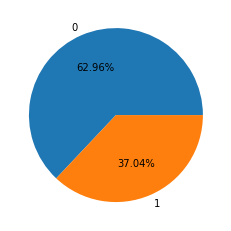

In [ ]:
plt.pie(x = list(new['is_canceled']), 
           labels = list(new['index']),
           autopct = '%.2f%%')
plt.show()

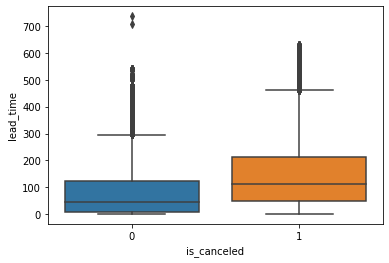

In [ ]:
sns.boxplot(x = 'is_canceled', y = 'lead_time', data = hotel)

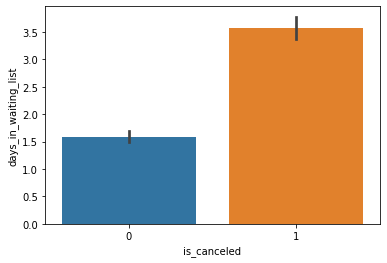

In [ ]:
sns.barplot(x = 'is_canceled', y = 'days_in_waiting_list', data = hotel)

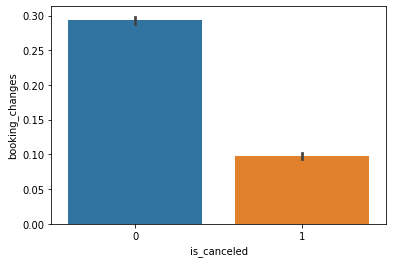

In [ ]:
sns.barplot(x = 'is_canceled', y = 'booking_changes', data = hotel)

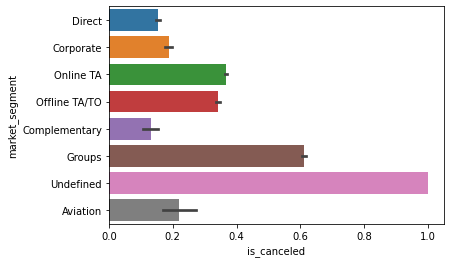

In [ ]:
sns.barplot(x = 'is_canceled', y = 'market_segment', data = hotel)

In [ ]:
new = pd.DataFrame(hotel['is_canceled'].value_counts()/hotel['is_canceled'].count())
new.reset_index(inplace = True)
new

plt.pie(x = list(new['is_canceled']), 
           labels = list(new['index']),
           autopct = '%.2f%%')
plt.show()

In [ ]:
cor = hotel.corr()

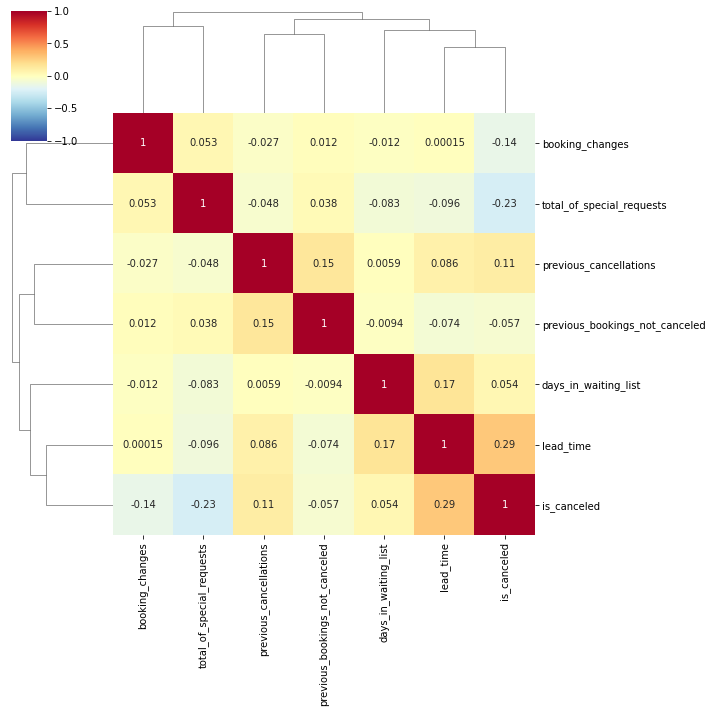

In [ ]:
sns.clustermap(cor, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

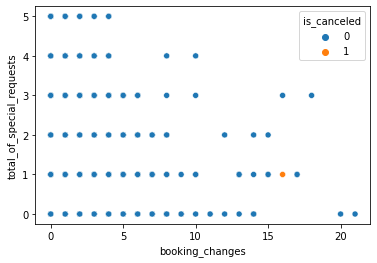

In [ ]:
sns.scatterplot(data=hotel, x='booking_changes', y='total_of_special_requests',
                hue='is_canceled'               
               )


(array([1.1782e+05, 1.3030e+03, 1.8100e+02, 4.8000e+01, 1.4000e+01,
        4.0000e+00, 1.0000e+01, 5.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0. ,  2.1,  4.2,  6.3,  8.4, 10.5, 12.6, 14.7, 16.8, 18.9, 21. ]),
 <a list of 10 Patch objects>)

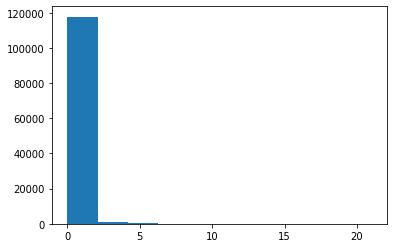

In [ ]:
plt.hist(hotel['booking_changes'])

In [ ]:
hotel['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

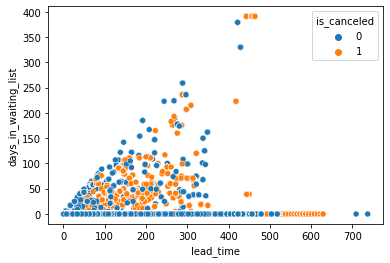

In [ ]:
sns.scatterplot(data=hotel, x='lead_time', y='days_in_waiting_list',
                hue='is_canceled'               
               )

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
target ='is_canceled'
train, test = train_test_split(hotel, train_size=0.80, test_size=0.20, stratify=hotel[target], random_state=2)

train, val = train_test_split(train, train_size=0.80, test_size=0.20, stratify=train[target], random_state=2)
train.shape, val.shape, test.shape

((76409, 10), (19103, 10), (23878, 10))

In [ ]:

features = train.drop(columns=[target]).columns
X_train = train[features] 
y_train = train[target] 
X_val = val[features] 
y_val = val[target] 
X_test = test[features]
y_test = test[target]



In [ ]:
X = train[features]
y = train[target]

In [ ]:
#기준모델
major = y_train.mode()[0]
y_pred = [major]*len(y_train)

from sklearn.metrics import accuracy_score,f1_score
print('accuracy:', accuracy_score(y_train,y_pred),
      'f1:', f1_score(y_train,y_pred))

accuracy: 0.6295855200303629 f1: 0.0


In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 647 kB/s 


In [ ]:
#기준모델

In [ ]:
#로지스틱

In [ ]:
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import make_pipeline

In [ ]:
# 훈련/검증/테스트 데이터를 특성과 타겟으로 분리합니다
X_train = train[features] 
y_train = train[target] 
X_val = val[features] 
y_val = val[target] 
X_test = test[features]

from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import make_pipeline

pipe = make_pipeline( OneHotEncoder(), SimpleImputer(),
StandardScaler(),
LogisticRegression(n_jobs= - 1) )
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
print('검증세트 정확도', pipe.score(X_val, y_val),
      'f1-score', f1_score(y_val, y_pred)) 



검증세트 정확도 0.798303931319688 f1-score 0.6649856534214417


In [ ]:
#desicison classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
pipe = make_pipeline(
    OneHotEncoder(use_cat_names= True),
    SimpleImputer(),
    DecisionTreeClassifier(random_state=1, 
                           criterion='entropy')
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
print('훈련 정확도: ', pipe.score(X_train, y_train)) 
print('검증 정확도: ', pipe.score(X_val, y_val))
'f1-score', f1_score(y_val, y_pred)

훈련 정확도:  0.8469682890758942
검증 정확도:  0.8080929696906245


('f1-score', 0.7194674012855833)

In [ ]:
from category_encoders import TargetEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [ ]:

pipe = make_pipeline(
    TargetEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)
)
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_val)
print('검증 정확도: ', pipe.score(X_val, y_val))
'f1-score', f1_score(y_val, y_pred)

Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327


검증 정확도:  0.8086687954771502


('f1-score', 0.7241717606218399)

In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85     12027
           1       0.78      0.68      0.72      7076

    accuracy                           0.81     19103
   macro avg       0.80      0.78      0.79     19103
weighted avg       0.81      0.81      0.81     19103



In [ ]:
y_pred_proba = pipe.predict_proba(X_val)[:, 1]

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc = pd.DataFrame({ 'FPR(Fall-out)': fpr, 'TPRate(Recall)': tpr, 'Threshold': thresholds
})
roc

,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.000000,2.000000
1,0.001746,0.391464,1.000000
2,0.001746,0.391888,0.998333
3,0.001746,0.392029,0.997561
4,0.001829,0.392453,0.997500
...,...,...,...
3111,0.803692,0.976823,0.000500
3112,0.803858,0.976823,0.000400
3113,0.804274,0.976823,0.000357
3114,0.804440,0.976823,0.000108


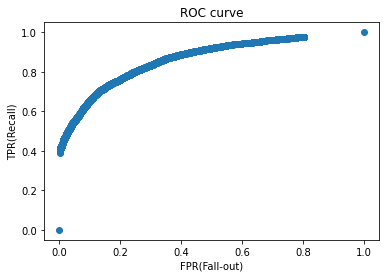

In [ ]:
plt.scatter(fpr, tpr) 
plt.title('ROC curve')
plt. xlabel('FPR(Fall-out)') 
plt. ylabel('TPR(Recall)');

In [ ]:
import numpy as np
optimal_idx = np.argmax(tpr - fpr) 
optimal_threshold = thresholds[optimal_idx]
print('idx:', optimal_idx, ', threshold:', optimal_threshold)

idx: 983 , threshold: 0.4701648896359113


In [ ]:

from sklearn.metrics import roc_auc_score 
auc_score = roc_auc_score(y_val, y_pred_proba)
auc_score

0.8652270719973709

In [ ]:
y_pred_optimal = y_pred_proba >= optimal_threshold 
print(classification_report(y_val, y_pred_optimal))
print('검증 정확도: ', pipe.score(X_val, y_val))
'f1-score', f1_score(y_val, y_pred_optimal)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85     12027
           1       0.76      0.70      0.73      7076

    accuracy                           0.81     19103
   macro avg       0.80      0.79      0.79     19103
weighted avg       0.81      0.81      0.81     19103

검증 정확도:  0.8086687954771502


('f1-score', 0.7299816513761468)

In [ ]:
#최종 test모델
y_pred_proba = pipe.predict_proba(X_test)[:, 1]
y_pred_optimal = y_pred_proba >= optimal_threshold 
print(classification_report(y_test, y_pred_optimal))
print('검증 정확도: ', pipe.score(X_test, y_test))
'f1-score', f1_score(y_test, y_pred_optimal)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85     15033
           1       0.76      0.70      0.73      8845

    accuracy                           0.81     23878
   macro avg       0.80      0.79      0.79     23878
weighted avg       0.81      0.81      0.81     23878

검증 정확도:  0.8109975709858447


('f1-score', 0.729106458271896)

In [ ]:
from sklearn.metrics import roc_auc_score 
auc_score = roc_auc_score(y_val, y_pred_proba)
auc_score

0.8652270719973709

In [ ]:
#특성중요도

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
('rf', RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)) ])

In [ ]:
pipe. named_steps

{'preprocessing': Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                 ('simpleimputer', SimpleImputer())]),
 'rf': RandomForestClassifier(n_jobs=-1, random_state=2)}

In [ ]:
pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

검증 정확도:  0.8073601005077736


In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.2 MB/s 
     |████████████████████████████████| 133 kB 55.0 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=0921082b19078d1256af113da985591ce73c3174b357504fb00b4516d3713cf5
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompa

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
y_train.value_counts(normalize=True)

0    0.629586
1    0.370414
Name: is_canceled, dtype: float64

In [ ]:
ratio = 0.37/0.629

In [ ]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

processor = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]

# XGBoost 분류기를 학습시킵니다. 클래스 비율을 맞추기 위해 scale_pos_weight= #Charged Off / # Fully Paid
model = XGBClassifier(n_estimators=1000, verbosity=0, n_jobs=-1, scale_pos_weight=ratio)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

[0]	validation_0-auc:0.749081	validation_1-auc:0.752314
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.750843	validation_1-auc:0.753547
[2]	validation_0-auc:0.75289	validation_1-auc:0.755434
[3]	validation_0-auc:0.753565	validation_1-auc:0.755925
[4]	validation_0-auc:0.791719	validation_1-auc:0.793237
[5]	validation_0-auc:0.79239	validation_1-auc:0.792967
[6]	validation_0-auc:0.818025	validation_1-auc:0.819352
[7]	validation_0-auc:0.819136	validation_1-auc:0.820922
[8]	validation_0-auc:0.818066	validation_1-auc:0.818968
[9]	validation_0-auc:0.821203	validation_1-auc:0.822814
[10]	validation_0-auc:0.821715	validation_1-auc:0.823567
[11]	validation_0-auc:0.825623	validation_1-auc:0.829102
[12]	validation_0-auc:0.829501	validation_1-auc:0.831564
[13]	validation_0-auc:0.830289	validation_1-auc:0.832056
[14]	validation_0-auc:0.834756	validation_1-auc:0.836772


XGBClassifier(n_estimators=1000, n_jobs=-1, scale_pos_weight=0.5882352941176471,
              verbosity=0)

In [ ]:
from sklearn.metrics import roc_auc_score
X_test_processed = processor.transform(X_test)
X_val_processed = processor.transform(X_val)
class_index = 1
y_pred_proba = model.predict_proba(X_test_processed)[:, class_index]
print(f'Test AUC for class "{model.classes_[class_index]}":')
print(roc_auc_score(y_test, y_pred_proba)) # 범위는 0-1, 수치는 높을 수록 좋습니다

Test AUC for class "1":
0.863303844412088


In [ ]:
# Confution matrix를 확인해 봅시다
from sklearn.metrics import classification_report
y_test_pred = model.predict(X_test_processed)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86     15033
           1       0.88      0.54      0.67      8845

    accuracy                           0.80     23878
   macro avg       0.83      0.75      0.76     23878
weighted avg       0.82      0.80      0.79     23878



In [ ]:
row = X_test.iloc[[2000]]
row

,hotel,market_segment,deposit_type,lead_time,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,booking_changes,total_of_special_requests
15838,Resort Hotel,Offline TA/TO,No Deposit,143,0,0,0,0,1


In [ ]:
import xgboost
import shap


explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit')

In [ ]:
feature_names = row.columns
feature_values = row.values[0]
shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))

In [ ]:
pros = shaps.sort_values(ascending=False)[:3].index
cons = shaps.sort_values(ascending=True)[:3].index

In [ ]:
print('is_cancled 예측에 대한 Positive 요인 Top 3 입니다:')
for i, pro in enumerate(pros, start=1):
    feature_name, feature_value = pro
    print(f'{i}. {feature_name} : {feature_value}')

print('\n')
print('Negative 요인 Top 3 입니다:')
for i, con in enumerate(cons, start=1):
    feature_name, feature_value = con
    print(f'{i}. {feature_name} : {feature_value}')

is_cancled 예측에 대한 Positive 요인 Top 3 입니다:
1. previous_cancellations : 1
2. previous_bookings_not_canceled : 0
3. total_of_special_requests : 0


Negative 요인 Top 3 입니다:
1. market_segment : Groups
2. deposit_type : No Deposit
3. hotel : Resort Hotel


In [ ]:
def explain(row_number):
    positive_class = 'Fully Paid'
    positive_class_index = 1

    # row 값을 변환합니다
    row = X_test.iloc[[row_number]]
    row_processed = processor.transform(row)

    # 예측하고 예측확률을 얻습니다 
    pred = model.predict(row_processed)[0]
    pred_proba = model.predict_proba(row_processed)[0, positive_class_index]
    pred_proba *= 100
    if pred != positive_class:
        pred_proba = 100 - pred_proba

    # 예측결과와 확률값을 얻습니다
    print(f'예약 취소에 대한 예측결과는 {pred} 으로, 확률은 {pred_proba:.0f}% 입니다.')
    
    # SHAP를 추가합니다
    shap_values = explainer.shap_values(row_processed)

    # Fully Paid에 대한 top 3 pros, cons를 얻습니다
    feature_names = row.columns
    feature_values = row.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))
    pros = shaps.sort_values(ascending=False)[:3].index
    cons = shaps.sort_values(ascending=True)[:3].index

    # 예측에 가장 영향을 준 top3
    print('\n')
    print('Positive 영향을 가장 많이 주는 3가지 요인 입니다:')
    
    evidence = pros if pred == positive_class else cons
    for i, info in enumerate(evidence, start=1):
        feature_name, feature_value = info
        print(f'{i}. {feature_name} : {feature_value}')

    # 예측에 가장 반대적인 영향을 준 요인 top1
    print('\n')
    print('Negative 영향을 가장 많이 주는 3가지 요인 입니다:')
    
    evidence = cons if pred == positive_class else pros
    for i, info in enumerate(evidence, start=1):
        feature_name, feature_value = info
        print(f'{i}. {feature_name} : {feature_value}')

    # SHAP
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value, 
        shap_values=shap_values, 
        features=row, 
        link='logit'
    )

In [ ]:
explain(2000)

예약 취소에 대한 예측결과는 0 으로, 확률은 92% 입니다.


Positive 영향을 가장 많이 주는 3가지 요인 입니다:
1. market_segment : Offline TA/TO
2. total_of_special_requests : 1
3. deposit_type : No Deposit


Negative 영향을 가장 많이 주는 3가지 요인 입니다:
1. lead_time : 143
2. booking_changes : 0
3. hotel : Resort Hotel


In [ ]:
permuter = PermutationImportance( 
    pipe.named_steps['rf'], 
    scoring='accuracy',
    n_iter=5,  random_state= 42
)
# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_val_transformed = pipe.named_steps['preprocessing'].transform(X_val)
# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_transformed, y_val);

In [ ]:
feature_names = X_val.columns.tolist() 
pd.Series(permuter.feature_importances_, feature_names).sort_values()

In [ ]:
eli5. show_weights( permuter,top=None, 
                   feature_names=feature_names  )

Weight,Feature
0.0830 ± 0.0039,deposit_type
0.0732 ± 0.0045,lead_time
0.0715 ± 0.0030,market_segment
0.0685 ± 0.0050,total_of_special_requests
0.0367 ± 0.0013,previous_cancellations
0.0178 ± 0.0022,hotel
0.0152 ± 0.0018,booking_changes
0.0030 ± 0.0006,previous_bookings_not_canceled
0.0028 ± 0.0008,days_in_waiting_list


In [ ]:
print('특성 삭제 전:', X_train.shape, X_val.shape)

특성 삭제 전: (76409, 9) (19103, 9)


In [ ]:
minimum_importance = 0.05
mask = permuter.feature_importances_ > minimum_importance 
features = X_train.columns[mask]
X_train_selected = X_train[features]
X_val_selected = X_val[features]

In [ ]:
print('특성 삭제 후:', X_train_selected.shape, X_val_selected.shape)

특성 삭제 후: (76409, 4) (19103, 4)


In [ ]:
pipe = Pipeline([
    ('preprocessing', make_pipeline(
        OrdinalEncoder(), SimpleImputer())),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=2, 
                                      n_jobs=-1))], verbose=1) 

pipe.fit(X_train_selected, y_train);

[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.1s
[Pipeline] ................ (step 2 of 2) Processing rf, total=   5.3s


In [ ]:
print('검증 정확도: ', pipe.score(X_val_selected, y_val),
   'f1:', f1_score(y_val,y_pred))

검증 정확도:  0.7945872376066586 f1: 0.7241717606218399


In [ ]:
#pdp

In [ ]:
!pip install pdpbox

In [ ]:
pipe = make_pipeline(
    OrdinalEncoder(), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipe.fit(X, y);

In [ ]:
encoder = pipe.named_steps['ordinalencoder']
X_encoded = encoder.fit_transform(X,y)
rf = pipe.named_steps['randomforestclassifier']

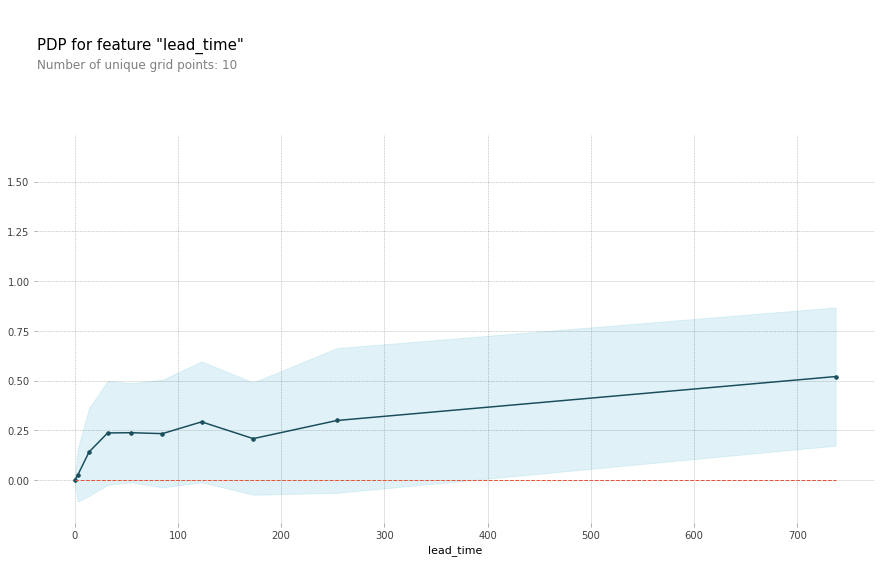

In [ ]:
import matplotlib.pyplot as plt
from pdpbox import pdp
feature = 'lead_time'
pdp_dist = pdp.pdp_isolate(model=rf, 
                           dataset=X_encoded, 
                           model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

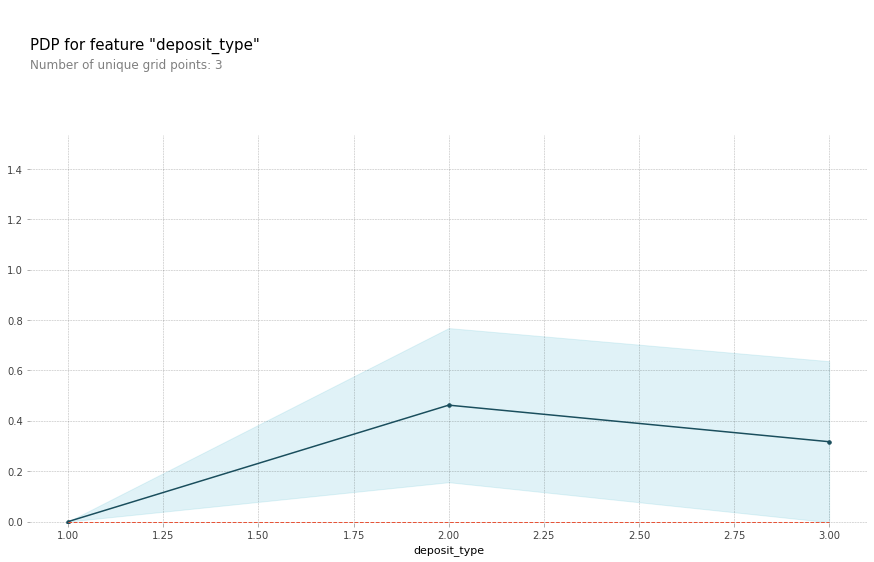

In [ ]:
import matplotlib.pyplot as plt
from pdpbox import pdp
feature = 'deposit_type'
pdp_dist = pdp.pdp_isolate(model=rf, 
                           dataset=X_encoded, 
                           model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

In [ ]:
encoder.mapping

[{'col': 'hotel', 'mapping': Resort Hotel    1
  City Hotel      2
  NaN            -2
  dtype: int64, 'data_type': dtype('O')},
 {'col': 'market_segment', 'mapping': Offline TA/TO    1
  Groups           2
  Online TA        3
  Corporate        4
  Direct           5
  Complementary    6
  Aviation         7
  Undefined        8
  NaN             -2
  dtype: int64, 'data_type': dtype('O')},
 {'col': 'deposit_type', 'mapping': No Deposit    1
  Non Refund    2
  Refundable    3
  NaN          -2
  dtype: int64, 'data_type': dtype('O')}]

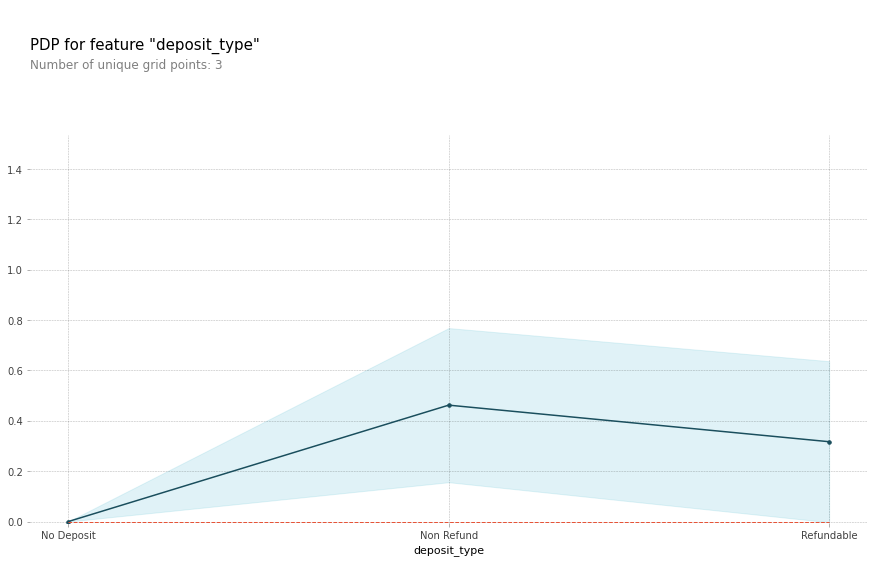

In [ ]:
pdp.pdp_plot(pdp_dist, feature)


plt.xticks([ 1,2,3], ['No Deposit','Non Refund', 'Refundable']);

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
#shap

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
target ='is_canceled'
train, test = train_test_split(hotel, train_size=0.80, test_size=0.20, stratify=hotel[target], random_state=2)

train, val = train_test_split(train, train_size=0.80, test_size=0.20, stratify=train[target], random_state=2)
train.shape, val.shape, test.shape
encoder = TargetEncoder()
features = ['deposit_type','lead_time','market_segment','total_of_special_requests']
X_train = train[features] 
X_train_encoded = encoder.fit_transform(X_train,y_train)
y_train = train[target] 
X_val = val[features] 
X_val_encoded = encoder.transform(X_val)
y_val = val[target] 
X_test = test[features]
X_test_encoded = encoder.transform(X_test)
y_test = test[target]

In [ ]:
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_distributions = { 
    'n_estimators': randint(50, 500), 
    'max_depth': [5, 10, 15, 20, None], 
    'max_features': uniform(0, 1), 
}

search = RandomizedSearchCV(
    RandomForestRegressor(random_state=2), 
    param_distributions=param_distributions, 
    n_iter=5, 
    cv=3, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1, 
    random_state=2
)

search.fit(X_train_encoded, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [ ]:
print('최적 하이퍼파라미터: ', search.best_params_)
print('CV MAE: ', -search.best_score_)
model = search.best_estimator_

최적 하이퍼파라미터:  {'max_depth': 20, 'max_features': 0.4353223926182769, 'n_estimators': 410}
CV MAE:  0.2789787833721102


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 4.9 MB/s 
